# Check Data

The purpose of this notebook is to perform sanity checks of datasets. Therefore, this notebook might contain code that is irrelevant to the building of the main model.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
sub = pd.read_csv("../data/submission.csv")

In [3]:
# distribution of labels
train.attack.value_counts()

0    11778
1     3222
Name: attack, dtype: int64

There is class imbalance: *For every comment that is a personal attack, there is ~4 comments that are personal attacks*

In [4]:
# preview one comment from each
print("Attack preview")
print(train[train.attack==1].text.iloc[3])
print("\nNot attack preview")
print(train[train.attack==0].text.iloc[2])

Attack preview
You could say the same about ``your version``.  I do feel sorry for you because you clearly know nothing about the subject, yet oddly feel compelled to aggressively and rudely defend the status quo, about which you are entirely ignorant.

Not attack preview
I just came to this page and was wondering why there is no ``Criticism`` or ``Controversy`` tab for me to click on at the top, I am aware her life is a source of controversy why can't I read about it


## Checking Numeric Data

In [5]:
train = pd.read_csv("../data/processed/train_numeric_final.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   text             15000 non-null  object 
 2   afinn            15000 non-null  float64
 3   you_count        15000 non-null  int64  
 4   caps_word_count  15000 non-null  int64  
 5   digits_count     15000 non-null  int64  
 6   dale_chall       15000 non-null  float64
 7   article_cnt      15000 non-null  int64  
 8   source_cnt       15000 non-null  int64  
 9   fu**_cnt         15000 non-null  int64  
 10  f*g_cnt          15000 non-null  int64  
 11  n***_cnt         15000 non-null  int64  
 12  REDIRECT_count   15000 non-null  int64  
 13  attack           15000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.6+ MB


In [6]:
train.head()

,id,text,afinn,you_count,caps_word_count,digits_count,dale_chall,article_cnt,source_cnt,fu**_cnt,f*g_cnt,n***_cnt,REDIRECT_count,attack
0,348598183,which may contain more details,0.0,0,0,0,10.20,0,0,0,0,0,0,0
1,61527923,"Regardless, the point is that I am willing to ...",3.0,4,0,0,9.81,1,0,0,0,0,0,1
2,325989249,Lede \nI'm reverting (again) the additions to...,-15.0,0,0,0,7.69,0,0,0,0,0,0,0
3,197250961,I just came to this page and was wondering why...,-5.0,0,0,0,6.83,0,1,0,0,0,0,0
4,116195271,It's worth having an illustration. The Type 2...,-3.0,0,0,1,8.44,0,0,0,0,0,0,1


In [7]:
train['len'] = train.text.apply(len)
train.head()

,id,text,afinn,you_count,caps_word_count,digits_count,dale_chall,article_cnt,source_cnt,fu**_cnt,f*g_cnt,n***_cnt,REDIRECT_count,attack,len
0,348598183,which may contain more details,0.0,0,0,0,10.20,0,0,0,0,0,0,0,30
1,61527923,"Regardless, the point is that I am willing to ...",3.0,4,0,0,9.81,1,0,0,0,0,0,1,320
2,325989249,Lede \nI'm reverting (again) the additions to...,-15.0,0,0,0,7.69,0,0,0,0,0,0,0,372
3,197250961,I just came to this page and was wondering why...,-5.0,0,0,0,6.83,0,1,0,0,0,0,0,199
4,116195271,It's worth having an illustration. The Type 2...,-3.0,0,0,1,8.44,0,0,0,0,0,0,1,141


## Checking Translated Data

In [11]:
import sys
sys.path.insert(0, '../src')

import texthero as hero
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import config
from preprocess import translate_text

In [12]:
train['translated'] = train.text.apply(translate_text)
train.head()

,id,text,afinn,you_count,caps_word_count,digits_count,dale_chall,article_cnt,source_cnt,fu**_cnt,f*g_cnt,n***_cnt,REDIRECT_count,attack,len,translated
0,348598183,which may contain more details,0.0,0,0,0,10.20,0,0,0,0,0,0,0,30,STOPWORD may contain STOPWORD details
1,61527923,"Regardless, the point is that I am willing to ...",3.0,4,0,0,9.81,1,0,0,0,0,0,1,320,Regardless STOPWORD point STOPWORD STOPWORD I ...
2,325989249,Lede \nI'm reverting (again) the additions to...,-15.0,0,0,0,7.69,0,0,0,0,0,0,0,372,Lede Im reverting STOPWORD STOPWORD additions ...
3,197250961,I just came to this page and was wondering why...,-5.0,0,0,0,6.83,0,1,0,0,0,0,0,199,I STOPWORD came STOPWORD STOPWORD STOPWORD STO...
4,116195271,It's worth having an illustration. The Type 2...,-3.0,0,0,1,8.44,0,0,0,0,0,0,1,141,Its worth STOPWORD STOPWORD illustration The T...


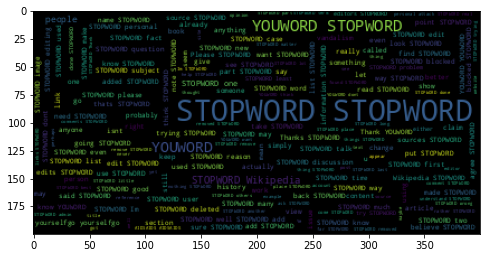

In [15]:
words = ' '.join(train['translated'])
wc = WordCloud().generate(words)
plt.figure(figsize=(8,5))
plt.imshow(wc)

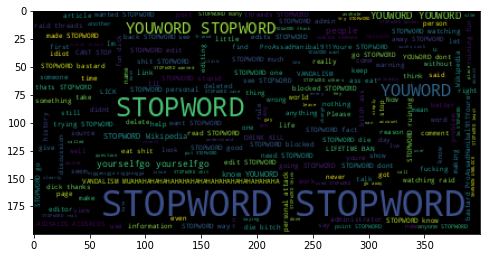

In [16]:
# attacks
words = ' '.join(train[train.attack==1]['translated'])
wc = WordCloud().generate(words)
plt.figure(figsize=(8,5))
plt.imshow(wc)

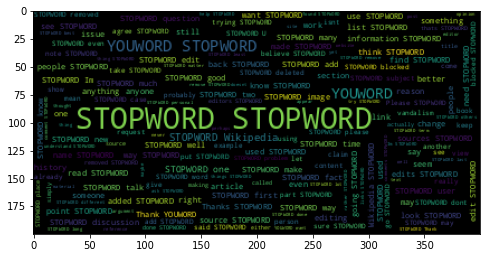

In [17]:
# non attacks
words = ' '.join(train[train.attack==0]['translated'])
wc = WordCloud().generate(words)
plt.figure(figsize=(8,5))
plt.imshow(wc)

In [18]:
token_frequencies = pd.DataFrame(hero.top_words(train['translated'], normalize=False))
token_frequencies['word'] = token_frequencies.index
token_frequencies.columns = ['frequency', 'word']
token_frequencies.frequency = round(token_frequencies.frequency, 3)
token_frequencies = token_frequencies.reset_index(drop=True)

# unique tokens
tokens = list(token_frequencies.word)

/root/venv/lib/python3.7/site-packages/texthero/visualization.py:182: FutureWarning: The default value of regex will change from True to False in a future version.
  pattern, r"\2 \3"


In [19]:
tokens[:10]

['STOPWORD',
 'YOUWORD',
 'I',
 'The',
 'like',
 'would',
 'You',
 'Wikipedia',
 'one',
 'dont']

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=94079369-10d1-4c3e-b7f5-859473c4f3a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>